# Pymaceuticals Inc.
---

### Analysis

- The summary table shows that Capomulin and Ramicane have the lowest mean tumor volume, the lowest median, the lowest variance, the lowest standard deviation, and the lowest standard error across all timepoints. This data implies that these two drug treatments were the most effective.
- More mice were treated with capomulin and ramicane, 230 and 228 respectively, while between 145 and 200 mice were treated with all other drugs. Capomulin and ramicane treated larger populations while maintaining the lowest medians, variance and standard deviation, implying that they must have been the most effective treatments.
- When comparing the top 4 performing drug treatments capomulin and ramicane showed a lower final tumor volume than infubinol and ceftamin, confirming that they must have been the most effective treatments.
- When looking at the tumor volume of a mouse treated with capomulin over time it is clear that tumor size decreases as treatment continues.
- When looking at the average tumor volume and weight of mice treated with capomulin there is a strong correlation showing that as tumor volume increases mouse weight increases.
 

In [282]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [283]:
# Checking the number of mice.
mouse_count = len(pd.unique(study_data_complete['Mouse ID']))

#display mice count
mouse_count

249

In [284]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [285]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_list = study_data_complete[study_data_complete['Mouse ID'] == 'g989']

duplicate_mice_list

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [286]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_complete[study_data_complete['Mouse ID'].str.contains('g989') == False]

clean_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [287]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(pd.unique(clean_study_data['Mouse ID']))

#display mice count
mouse_count_clean

248

## Summary Statistics

In [288]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#stores count, mean, std, min, quantiles, max
mean_vol = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_vol = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_vol = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
stdev_vol = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
stderr_vol = clean_study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_stats =pd.concat([mean_vol, median_vol, variance_vol, stdev_vol, 
                           stderr_vol], axis=1)

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 
                         'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 
                         'Tumor Volume Std. Err.']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [289]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats2 = clean_study_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [290]:
#obtain the mouse count by drug
mouse_count_drug = clean_study_data.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False)
mouse_count_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Number of Mice Treated with Each Drug Regimen')

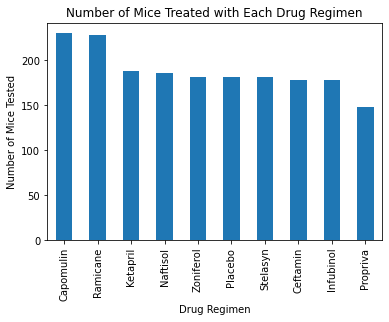

In [304]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barplot = mouse_count_drug.plot.bar(mouse_count_drug.index, mouse_count_drug)
barplot.set_xlabel('Drug Regimen')
barplot.set_ylabel('Number of Mice Tested')
barplot.set_title('Number of Mice Treated with Each Drug Regimen')

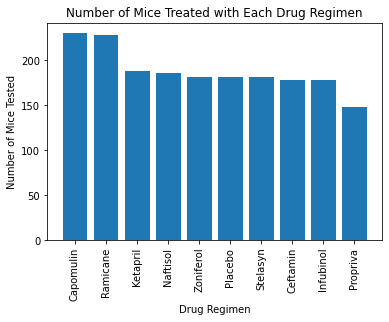

In [303]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mouse_count_drug.index, mouse_count_drug, color='tab:blue')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.title('Number of Mice Treated with Each Drug Regimen')
plt.show()


In [293]:
#obtain the number of male and female mice
sex_count = clean_study_data.groupby(['Sex'])['Sex'].count().sort_values(ascending=False)
sex_count

Sex
Male      958
Female    922
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Number of Male vs Female Mice')

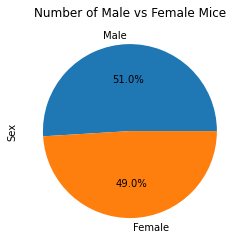

In [305]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = sex_count.plot.pie(autopct='%1.1f%%')
pie_plot.set_title('Number of Male vs Female Mice')

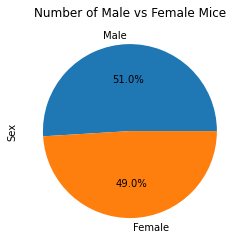

In [306]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Number of Male vs Female Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [296]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Capomulin']
ramicane = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Ramicane']
infubinol = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Infubinol']
ceftamin = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin.groupby(['Mouse ID']).max()['Timepoint']
ramicane_last = ramicane.groupby(['Mouse ID']).max()['Timepoint']
infubinol_last = infubinol.groupby(['Mouse ID']).max()['Timepoint']
ceftamin_last = ceftamin.groupby(['Mouse ID']).max()['Timepoint']
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merged = pd.merge(capomulin_last, clean_study_data, on=('Mouse ID', 'Timepoint'), how='inner')
ramicane_merged = pd.merge(ramicane_last, clean_study_data, on=('Mouse ID', 'Timepoint'), how='left' )
infubinol_merged = pd.merge(infubinol_last, clean_study_data, on=('Mouse ID', 'Timepoint'), how='left' )
ceftamin_merged = pd.merge(ceftamin_last, clean_study_data, on=('Mouse ID', 'Timepoint'), how='left' )

#merge the top 4 drugs dataframes
drugs_merged = pd.concat([capomulin_merged, ramicane_merged, infubinol_merged, ceftamin_merged]).reset_index()

drugs_merged


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,45,38.982878,2,Capomulin,Female,9,22
1,1,b742,45,38.939633,0,Capomulin,Male,7,21
2,2,f966,20,30.485985,0,Capomulin,Male,16,17
3,3,g288,45,37.074024,1,Capomulin,Male,3,19
4,4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...,...
95,20,x226,0,45.000000,0,Ceftamin,Male,23,28
96,21,x581,45,64.634949,3,Ceftamin,Female,19,28
97,22,x822,45,61.386660,3,Ceftamin,Male,3,29
98,23,y769,45,68.594745,4,Ceftamin,Female,6,27


In [297]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = drugs_merged.loc[drugs_merged['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    # add subset 
    vol_data.append(tumor_volume)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    IQR = q3-q1
    upper = q3 + 1.5*IQR
    lower = q1 - 1.5*IQR
    outliers = (tumor_volume.loc[(tumor_volume >= upper) | (tumor_volume <= lower)])
    #print the drug name and outliers
    print(f"{regimen}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Final Tumor Volume (m3) by Drug Treatment')

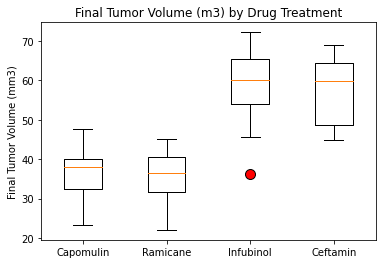

In [307]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(vol_data, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'Red'})
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title('Final Tumor Volume (m3) by Drug Treatment')

## Line and Scatter Plots

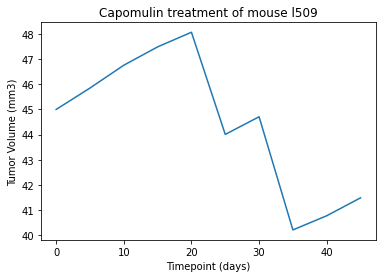

In [299]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#obtain dataframe with only mouse l509 data and store tumor volume and timepoint data in variables
mouse_l509 = clean_study_data[clean_study_data['Mouse ID'] == 'l509']
vol_l509 = mouse_l509['Tumor Volume (mm3)']
time_l509 = mouse_l509['Timepoint']

#create line plot
plt.plot(time_l509, vol_l509)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

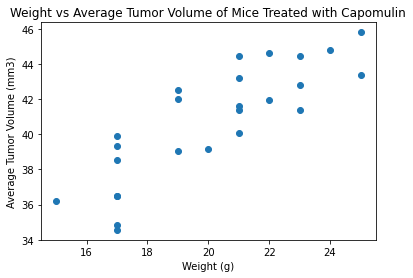

In [308]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#use the capomulin only data and obtain the unique mouse IDs
capomulin_mice = capomulin['Mouse ID'].unique()

#use the capomulin only data to obtain the mean weight and average tumor volume for each mouse
mouse_weight = capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()
average_tumor = capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()

#create scatterplot with the mouse weight on the x axis and average tumor size on the y axis
plt.scatter(mouse_weight, average_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume of Mice Treated with Capomulin')
plt.show()


## Correlation and Regression

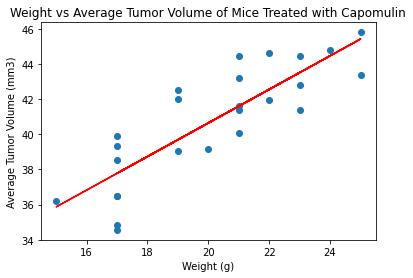

The correlation between mouse weight and the average tumor volume is 0.71


In [309]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#scatterplo
plt.scatter(mouse_weight, average_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume of Mice Treated with Capomulin')

#obtain the slope, intercept, r-value, p-value, and standard deviation using linear regression function
slope, int, r, p, std_err = st.linregress(mouse_weight, average_tumor)
#use the slope, the latitudes and the intercept to create a fit line
fit = slope*mouse_weight + int

#add the line on top of the scatterplot and create label to display the linear regression formula on the plot
plt.plot(mouse_weight, fit, color='red')
plt.show()

#display the correlation coefficient, r**2
print(f'The correlation between mouse weight and the average tumor volume is {round(r**2, 2)}')